# Calibration

Evaluating calibration methods on convolutional neural networks.

In [1]:
import numpy as np
import pandas as pd
from os.path import join
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from cal_methods import TemperatureScaling, evaluate, softmax, cal_results

Using TensorFlow backend.


Paths to files with logits.

In [2]:
PATH = '/Users/wildflowerlyi/Desktop/Github/NN_calibration/'
files = ('resnet_cifar/probs_resnet110_c10clip_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha1_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha06_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha04_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha01_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha005_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_2250mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_1125mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_560mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3_2250mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3_1125mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3_560mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_45000_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_22500_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_11250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_5625_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_4500_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_560_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_largesample_baseline_22500_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_11250_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_5625_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_4500_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_1125_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_560_logits.p'
        )

### Isotonic Regression

In [3]:
df_iso = cal_results(IsotonicRegression, PATH, files, {'y_min':0, 'y_max':1}, approach = "single")

cifar/probs_resnet110_c10clip
('Accuracy:', 93.43)
('Error:', 6.569999999999993)
('ECE:', 0.04945112048983577)
('MCE:', 0.3290730118751526)
('Loss:', 0.37601464391059347)
cifar/probs_resnet110_c10clip_augmean
('Accuracy:', 93.01)
('Error:', 6.989999999999995)
('ECE:', 0.04638580127060413)
('MCE:', 0.32111917436122894)
('Loss:', 0.3885267087939526)
cifar/probs_resnet110_c10clip_aug_2250mean
('Accuracy:', 92.69)
('Error:', 7.310000000000002)
('ECE:', 0.05112848895192146)
('MCE:', 0.3638733774423599)
('Loss:', 0.37633696130207867)
cifar/probs_resnet110_c10clip_aug_1125mean
('Accuracy:', 92.82000000000001)
('Error:', 7.179999999999993)
('ECE:', 0.05065809172987938)
('MCE:', 0.33941681563854215)
('Loss:', 0.3812145050069002)
cifar/probs_resnet110_c10clip_aug_560mean
('Accuracy:', 93.27)
('Error:', 6.730000000000004)
('ECE:', 0.04739113273620607)
('MCE:', 0.27788410355283333)
('Loss:', 0.3663087175342839)
cifar/probs_resnet110_c10clip_aug
('Accuracy:', 92.47999999999999)
('Error:', 7.5200000

cifar/probs_resnet110_c10clip_aug_2250mean_beta
('Accuracy:', 93.12)
('Error:', 6.8799999999999955)
('ECE:', 0.04845466447472577)
('MCE:', 0.307323100687075)
('Loss:', 0.37181581465272656)
cifar/probs_resnet110_c10clip_aug_1125mean_beta
('Accuracy:', 93.34)
('Error:', 6.659999999999997)
('ECE:', 0.04661724667847158)
('MCE:', 0.28653532309191565)
('Loss:', 0.3663818326851032)
cifar/probs_resnet110_c10clip_aug_560mean_beta
('Accuracy:', 93.14)
('Error:', 6.859999999999999)
('ECE:', 0.049521482434868785)
('MCE:', 0.3158037737437658)
('Loss:', 0.37638439779217864)
cifar/probs_resnet110_c10clip_aug3mean_beta
('Accuracy:', 91.51)
('Error:', 8.489999999999995)
('ECE:', 0.05810054212808613)
('MCE:', 0.32037639021873476)
('Loss:', 0.4531102672234489)
cifar/probs_resnet110_c10clip_aug3_2250mean_beta
('Accuracy:', 92.29)
('Error:', 7.709999999999994)
('ECE:', 0.05431022298634048)
('MCE:', 0.35536701274368)
('Loss:', 0.39696226834854)
cifar/probs_resnet110_c10clip_aug3_1125mean_beta
('Accuracy:', 

### Temperature scaling

In [4]:
df_temp_scale = cal_results(TemperatureScaling, PATH, files, approach = "all")

cifar/probs_resnet110_c10clip
('Accuracy:', 93.43)
('Error:', 6.569999999999993)
('ECE:', 0.04945112048983577)
('MCE:', 0.3290730118751526)
('Loss:', 0.37601464391059347)
cifar/probs_resnet110_c10clip_augmean
('Accuracy:', 93.01)
('Error:', 6.989999999999995)
('ECE:', 0.04638580127060413)
('MCE:', 0.32111917436122894)
('Loss:', 0.3885267087939526)
cifar/probs_resnet110_c10clip_aug_2250mean
('Accuracy:', 92.69)
('Error:', 7.310000000000002)
('ECE:', 0.05112848895192146)
('MCE:', 0.3638733774423599)
('Loss:', 0.37633696130207867)
cifar/probs_resnet110_c10clip_aug_1125mean
('Accuracy:', 92.82000000000001)
('Error:', 7.179999999999993)
('ECE:', 0.05065809172987938)
('MCE:', 0.33941681563854215)
('Loss:', 0.3812145050069002)
cifar/probs_resnet110_c10clip_aug_560mean
('Accuracy:', 93.27)
('Error:', 6.730000000000004)
('ECE:', 0.04739113273620607)
('MCE:', 0.27788410355283333)
('Loss:', 0.3663087175342839)
cifar/probs_resnet110_c10clip_aug
('Accuracy:', 92.47999999999999)
('Error:', 7.5200000

cifar/probs_resnet110_c10clip_aug_2250mean_beta
('Accuracy:', 93.12)
('Error:', 6.8799999999999955)
('ECE:', 0.04845466447472577)
('MCE:', 0.307323100687075)
('Loss:', 0.37181581465272656)
cifar/probs_resnet110_c10clip_aug_1125mean_beta
('Accuracy:', 93.34)
('Error:', 6.659999999999997)
('ECE:', 0.04661724667847158)
('MCE:', 0.28653532309191565)
('Loss:', 0.3663818326851032)
cifar/probs_resnet110_c10clip_aug_560mean_beta
('Accuracy:', 93.14)
('Error:', 6.859999999999999)
('ECE:', 0.049521482434868785)
('MCE:', 0.3158037737437658)
('Loss:', 0.37638439779217864)
cifar/probs_resnet110_c10clip_aug3mean_beta
('Accuracy:', 91.51)
('Error:', 8.489999999999995)
('ECE:', 0.05810054212808613)
('MCE:', 0.32037639021873476)
('Loss:', 0.4531102672234489)
cifar/probs_resnet110_c10clip_aug3_2250mean_beta
('Accuracy:', 92.29)
('Error:', 7.709999999999994)
('ECE:', 0.05431022298634048)
('MCE:', 0.35536701274368)
('Loss:', 0.39696226834854)
cifar/probs_resnet110_c10clip_aug3_1125mean_beta
('Accuracy:', 

#### Calibrated scores for CIFAR datasets.

In [5]:
df_iso

,Name,Error,ECE,MCE,Loss
0,cifar/probs_resnet110_c10clip,6.57,0.049451,0.329073,0.376015
1,cifar/probs_resnet110_c10clip_calib,6.45,0.013637,0.098281,0.277402
2,cifar/probs_resnet110_c10clip_augmean,6.99,0.046386,0.321119,0.388527
3,cifar/probs_resnet110_c10clip_augmean_calib,7.13,0.013400,0.181916,0.351594
4,cifar/probs_resnet110_c10clip_aug_2250mean,7.31,0.051128,0.363873,0.376337
5,cifar/probs_resnet110_c10clip_aug_2250mean_calib,7.27,0.015229,0.262662,0.291171
6,cifar/probs_resnet110_c10clip_aug_1125mean,7.18,0.050658,0.339417,0.381215
7,cifar/probs_resnet110_c10clip_aug_1125mean_calib,7.19,0.014753,0.136246,0.347010
8,cifar/probs_resnet110_c10clip_aug_560mean,6.73,0.047391,0.277884,0.366309
9,cifar/probs_resnet110_c10clip_aug_560mean_calib,6.93,0.010145,0.089232,0.277712


In [6]:
df_temp_scale

,Name,Error,ECE,MCE,Loss
0,cifar/probs_resnet110_c10clip,6.57,0.049451,0.329073,0.376015
1,cifar/probs_resnet110_c10clip_calib,6.57,0.009663,0.132728,0.214640
2,cifar/probs_resnet110_c10clip_augmean,6.99,0.046386,0.321119,0.388527
3,cifar/probs_resnet110_c10clip_augmean_calib,6.99,0.008131,0.250516,0.267974
4,cifar/probs_resnet110_c10clip_aug_2250mean,7.31,0.051128,0.363873,0.376337
5,cifar/probs_resnet110_c10clip_aug_2250mean_calib,7.31,0.009419,0.240732,0.256992
6,cifar/probs_resnet110_c10clip_aug_1125mean,7.18,0.050658,0.339417,0.381215
7,cifar/probs_resnet110_c10clip_aug_1125mean_calib,7.18,0.011827,0.120542,0.252089
8,cifar/probs_resnet110_c10clip_aug_560mean,6.73,0.047391,0.277884,0.366309
9,cifar/probs_resnet110_c10clip_aug_560mean_calib,6.73,0.006387,0.145598,0.234207


## Dataframe with results 

In [7]:
dfs = [df_iso, df_temp_scale]
names = ["Name", "Uncalibrated", "Isotonic Regression", "Temperature Scaling"]


def get_dataframe(dfs, column, names):

    df_res = pd.DataFrame(columns=names)

    for i in range(1, len(df_iso), 2):

        name = dfs[0].iloc[i-1]["Name"] # Get name of method
        uncalibrated = dfs[0].iloc[i-1][column]  # Get uncalibrated score

        row = [name, uncalibrated]  # Add scores to row

        for df in dfs:
            row.append(df.iloc[i][column])

        df_res.loc[(i-1)//2] = row
    
    df_res.set_index('Name', inplace = True)
        
    return df_res

In [8]:
df_error = get_dataframe(dfs, "Error", names)
df_ece = get_dataframe(dfs, "ECE", names)
df_mce = get_dataframe(dfs, "MCE", names)
df_loss = get_dataframe(dfs, "Loss", names)

In [23]:
print(df_error.iloc[:,0])

Name
cifar/probs_resnet110_c10clip                                      6.57
cifar/probs_resnet110_c10clip_augmean                              6.99
cifar/probs_resnet110_c10clip_aug_2250mean                         7.31
cifar/probs_resnet110_c10clip_aug_1125mean                         7.18
cifar/probs_resnet110_c10clip_aug_560mean                          6.73
cifar/probs_resnet110_c10clip_aug                                  7.52
cifar/probs_resnet110_c10clip_aug_2250                             7.26
cifar/probs_resnet110_c10clip_aug_1125                             7.06
cifar/probs_resnet110_c10clip_aug_560                              6.71
cifar/probs_resnet110_c10clip_aug_interpol2mean                    7.03
cifar/probs_resnet110_c10clip_aug_interpol2_2250mean               6.81
cifar/probs_resnet110_c10clip_aug_interpol2_1125mean               6.75
cifar/probs_resnet110_c10clip_aug_interpol2_560mean                6.93
cifar/probs_resnet110_c10clip_aug_interpol2                

In [62]:
df_ece.iloc[43:47, 0]

Name
cifar/probs_resnet110_c10clip_augmean_beta         0.053234
cifar/probs_resnet110_c10clip_aug_2250mean_beta    0.048455
cifar/probs_resnet110_c10clip_aug_1125mean_beta    0.046617
cifar/probs_resnet110_c10clip_aug_560mean_beta     0.049521
Name: Uncalibrated, dtype: float64

In [9]:
# Plots to illustrate SLI and mixup results by the number of pairs, for beta lambda (largesample)

import matplotlib.pyplot as plt
import numpy as np

numpairs = np.array([560, 1125, 2250, 4500, 5625, 11250, 22500, 45000])
numpairsmixup = np.array([1125, 4500, 22500])
ecelargesample = df_ece.iloc[51:59, 1]
mcelargesample = df_mce.iloc[51:59, 1]
losslargesample = df_loss.iloc[51:59, 1]
errorlargesample = df_error.iloc[51:59, 1]
ecelargesamplemixup = df_ece.iloc[59:62, 1]
mcelargesamplemixup = df_mce.iloc[59:62, 1]
losslargesamplemixup = df_loss.iloc[59:62, 1]
errorlargesamplemixup = df_error.iloc[59:62, 1]

# style
plt.style.use('seaborn-whitegrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

# Plot ECE 
plt.figure(1)
plt.plot(numpairs, ecelargesample, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='Latent Blending')

# Add legend and labels
#plt.legend(loc='best')
plt.title("ECE by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("ECE")

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/largesampleecebypairs.png')

# Plot MCE 
plt.figure(2)
plt.plot(numpairs, mcelargesample, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='Latent Blending')

# Add legend and labels
#plt.legend(loc='best')
plt.title("MCE by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("MCE")

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/largesamplemcebypairs.png')

# Plot error
plt.figure(3)
plt.plot(numpairs, errorlargesample, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='Latent Blending')

# Add legend and labels
#plt.legend(loc='best')
plt.title("Error by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("Error (%)")

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/largesampleerrorbypairs.png')

# Plot loss 
plt.figure(4)
plt.plot(numpairs, losslargesample, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='Latent Blending')

# Add legend and labels
#plt.legend(loc='best')
plt.title("Loss by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("Loss")

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/largesamplelossbypairs.png')

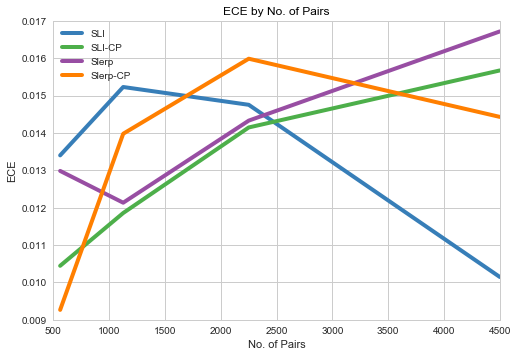

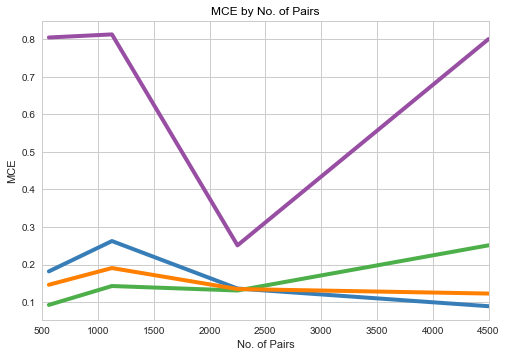

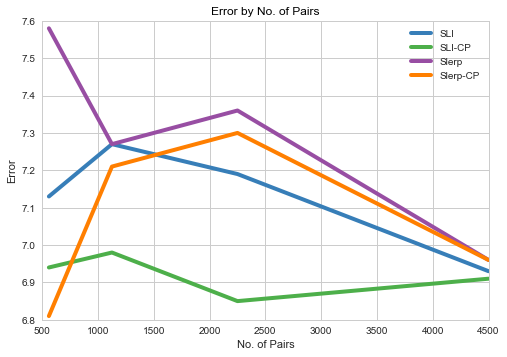

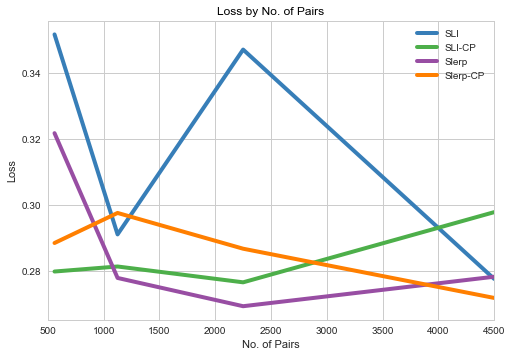

In [23]:
# Plots to illustrate SLI results against the baseline by number of pairs, for uniform lambda

import matplotlib.pyplot as plt
import numpy as np

numpairs = np.array([560, 1125, 2250, 4500])

# style
plt.style.use('seaborn-whitegrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

# Plot ECE for mixup by alpha value
eceuniformaugmean1 = df_ece.iloc[1:5, 1]
eceuniformaugmean2 = df_ece.iloc[9:13, 1]
eceuniformaugmean3 = df_ece.iloc[17:21, 1]
eceuniformaugmean4 = df_ece.iloc[25:29, 1]

plt.figure(1)
plt.plot(numpairs, eceuniformaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, eceuniformaugmean2, markerfacecolor='blue', markersize=12, color=palette(2), linewidth=4, label='SLI-CP')
plt.plot(numpairs, eceuniformaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')
plt.plot(numpairs, eceuniformaugmean4, markerfacecolor='blue', markersize=12, color=palette(4), linewidth=4, label='Slerp-CP')

# Add legend and labels
plt.legend(loc='best')
plt.title("ECE by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("ECE")
plt.xlim(500, 4500)
plt.ylim(0.009, 0.017)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/uniformecebypairs.png')

# Plot MCE for mixup by alpha value
mceuniformaugmean1 = df_mce.iloc[1:5, 1]
mceuniformaugmean2 = df_mce.iloc[9:13, 1]
mceuniformaugmean3 = df_mce.iloc[17:21, 1]
mceuniformaugmean4 = df_mce.iloc[25:29, 1]

plt.figure(2)
plt.plot(numpairs, mceuniformaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, mceuniformaugmean2, markerfacecolor='blue', markersize=12, color=palette(2), linewidth=4, label='SLI-CP')
plt.plot(numpairs, mceuniformaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')
plt.plot(numpairs, mceuniformaugmean4, markerfacecolor='blue', markersize=12, color=palette(4), linewidth=4, label='Slerp-CP')

# Add legend and labels
#plt.legend(loc='best')
plt.title("MCE by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("MCE")
plt.xlim(500, 4500)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/uniformmcebypairs.png')

# Plot Error for mixup by alpha value
erroruniformaugmean1 = df_error.iloc[1:5, 1]
erroruniformaugmean2 = df_error.iloc[9:13, 1]
erroruniformaugmean3 = df_error.iloc[17:21, 1]
erroruniformaugmean4 = df_error.iloc[25:29, 1]

plt.figure(3)
plt.plot(numpairs, erroruniformaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, erroruniformaugmean2, markerfacecolor='blue', markersize=12, color=palette(2), linewidth=4, label='SLI-CP')
plt.plot(numpairs, erroruniformaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')
plt.plot(numpairs, erroruniformaugmean4, markerfacecolor='blue', markersize=12, color=palette(4), linewidth=4, label='Slerp-CP')

# Add legend and labels
plt.legend(loc='best')
plt.title("Error by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("Error")
plt.xlim(500, 4500)
plt.ylim(6.8,7.6)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/uniformerrorbypairs.png')

# Plot Loss for mixup by alpha value
lossuniformaugmean1 = df_loss.iloc[1:5, 1]
lossuniformaugmean2 = df_loss.iloc[9:13, 1]
lossuniformaugmean3 = df_loss.iloc[17:21, 1]
lossuniformaugmean4 = df_loss.iloc[25:29, 1]

plt.figure(4)
plt.plot(numpairs, lossuniformaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, lossuniformaugmean2, markerfacecolor='blue', markersize=12, color=palette(2), linewidth=4, label='SLI-CP')
plt.plot(numpairs, lossuniformaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')
plt.plot(numpairs, lossuniformaugmean4, markerfacecolor='blue', markersize=12, color=palette(4), linewidth=4, label='Slerp-CP')

# Add legend and labels
plt.legend(loc='best')
plt.title("Loss by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("Loss")
plt.xlim(500, 4500)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/uniformlossbypairs.png')

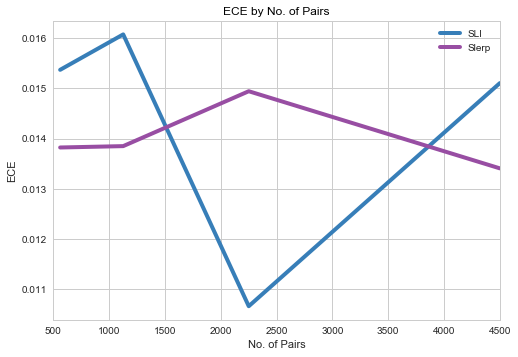

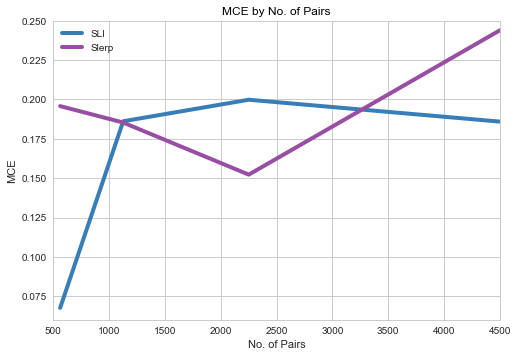

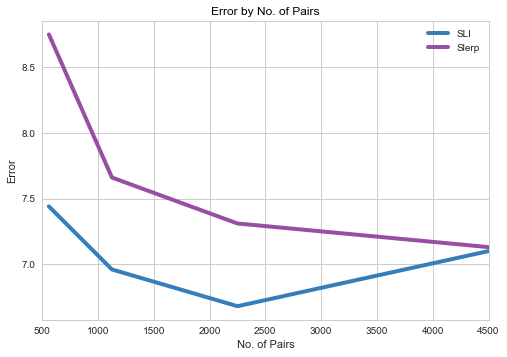

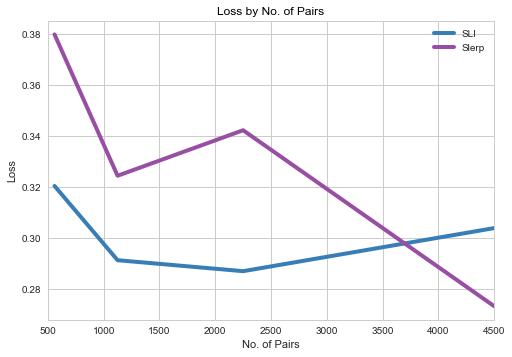

In [27]:
# Plots to illustrate SLI results against the baseline by number of pairs, for beta lambda

import matplotlib.pyplot as plt
import numpy as np

numpairs = np.array([560, 1125, 2250, 4500])

# style
plt.style.use('seaborn-whitegrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

# Plot ECE for mixup by alpha value
ecebetaaugmean1 = df_ece.iloc[43:47, 1]
ecebetaaugmean3 = df_ece.iloc[47:51, 1]

plt.figure(1)
plt.plot(numpairs, ecebetaaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, ecebetaaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')

# Add legend and labels
plt.legend(loc='best')
plt.title("ECE by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("ECE")
plt.xlim(500,4500)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/betaecebypairs.png')

# Plot MCE for mixup by alpha value
mcebetaaugmean1 = df_mce.iloc[43:47, 1]
mcebetaaugmean3 = df_mce.iloc[47:51, 1]

plt.figure(2)
plt.plot(numpairs, mcebetaaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, mcebetaaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')

# Add legend and labels
plt.legend(loc='best')
plt.title("MCE by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("MCE")
plt.xlim(500,4500)
plt.ylim(0.06,0.25)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/betamcebypairs.png')

# Plot Error for mixup by alpha value
errorbetaaugmean1 = df_error.iloc[43:47, 1]
errorbetaaugmean3 = df_error.iloc[47:51, 1]

plt.figure(3)
plt.plot(numpairs, errorbetaaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, errorbetaaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')

# Add legend and labels
plt.legend(loc='best')
plt.title("Error by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("Error")
plt.xlim(500,4500)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/betaerrorbypairs.png')

# Plot loss for mixup by alpha value
lossbetaaugmean1 = df_loss.iloc[43:47, 1]
lossbetaaugmean3 = df_loss.iloc[47:51, 1]

plt.figure(4)
plt.plot(numpairs, lossbetaaugmean1, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='SLI')
plt.plot(numpairs, lossbetaaugmean3, markerfacecolor='blue', markersize=12, color=palette(3), linewidth=4, label='Slerp')

# Add legend and labels
plt.legend(loc='best')
plt.title("Loss by No. of Pairs", fontsize=12, fontweight=0, color='black')
plt.xlabel("No. of Pairs")
plt.ylabel("Loss")
plt.xlim(500,4500)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/betalossbypairs.png')

In [9]:
# Plots to illustrate results for mixup for various values of lambda

import matplotlib.pyplot as plt
import numpy as np

alphas = np.array([0.05, 0.1, 0.2, 0.4, 0.6, 1.0])
numpairs = np.array([560, 1125, 2250, 4500, 5625, 11250, 22500, 45000, 90000])
ecemixup = df_ece.iloc[33:39, 1]
mcemixup = df_mce.iloc[33:39, 1]
lossmixup = df_loss.iloc[33:39, 1]
errormixup = df_error.iloc[33:39, 1]

# style
plt.style.use('seaborn-whitegrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

# Plot ECE for mixup by alpha value
plt.figure(1)
plt.plot(alphas, ecemixup, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='ECE')
plt.xlim(0.0, 1.0)
plt.ylim(0.0077, 0.013)

# Add legend and labels
#plt.legend(loc='best')
plt.title("ECE by Alpha, Mixup", fontsize=12, fontweight=0, color='black')
plt.xlabel("Alpha")
plt.ylabel("ECE")

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/mixupecebyalpha.png')

# Plot MCE for mixup by alpha value
plt.figure(2)
plt.plot(alphas, mcemixup, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='MCE')
plt.xlim(0.0, 1.0)
plt.plot(alphas, mcemixup, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='MCE')
plt.ylim(0.08, 0.35)

# Add legend and labels
#plt.legend(loc='best')
plt.title("MCE by Alpha, Mixup", fontsize=12, fontweight=0, color='black')
plt.xlabel("Alpha")
plt.ylabel("MCE")

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/mixupmcebyalpha.png')

# Plot error for mixup by alpha value
plt.figure(3)
plt.plot(alphas, errormixup, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='Error')


# Add legend and labels
#plt.legend(loc='best')
plt.title("Error by Alpha, Mixup", fontsize=12, fontweight=0, color='black')
plt.xlabel("Alpha")
plt.ylabel("Error (%)")
plt.xlim(0.0, 1.0)

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/mixuperrorbyalpha.png')

# Plot loss for mixup by alpha value
plt.figure(4)
plt.plot(alphas, lossmixup, markerfacecolor='blue', markersize=12, color=palette(1), linewidth=4, label='Loss')
plt.xlim(0.0, 1.0)

# Add legend and labels
#plt.legend(loc='best')
plt.title("Loss by Alpha, Mixup", fontsize=12, fontweight=0, color='black')
plt.xlabel("Alpha")
plt.ylabel("Loss")

# Plot
plt.savefig('/Users/wildflowerlyi/Desktop/Plots/mixuplossbyalpha.png')

## Scores

In [21]:
def highlight_min(s):
    '''
    highlight the min in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

## Error Rate

In [22]:
df_error.style.apply(highlight_min, axis = 1)

,Uncalibrated,Isotonic Regression,Temperature Scaling
Name,,,
cifar/probs_resnet110_c10clip,6.57,6.45,6.57
cifar/probs_resnet110_c10clip_augmean,6.99,7.13,6.99
cifar/probs_resnet110_c10clip_aug_2250mean,7.31,7.27,7.31
cifar/probs_resnet110_c10clip_aug_1125mean,7.18,7.19,7.18
cifar/probs_resnet110_c10clip_aug_560mean,6.73,6.93,6.73
cifar/probs_resnet110_c10clip_aug,7.52,7.48,7.52
cifar/probs_resnet110_c10clip_aug_2250,7.26,7.31,7.26
cifar/probs_resnet110_c10clip_aug_1125,7.06,7.16,7.06
cifar/probs_resnet110_c10clip_aug_560,6.71,6.83,6.71


## ECE

In [23]:
df_ece.style.apply(highlight_min, axis = 1)

,Uncalibrated,Isotonic Regression,Temperature Scaling
Name,,,
cifar/probs_resnet110_c10clip,0.0494511,0.0136369,0.00966252
cifar/probs_resnet110_c10clip_augmean,0.0463858,0.0133997,0.00813075
cifar/probs_resnet110_c10clip_aug_2250mean,0.0511285,0.0152291,0.00941942
cifar/probs_resnet110_c10clip_aug_1125mean,0.0506581,0.0147528,0.0118265
cifar/probs_resnet110_c10clip_aug_560mean,0.0473911,0.0101452,0.00638738
cifar/probs_resnet110_c10clip_aug,0.0495661,0.0147355,0.00701188
cifar/probs_resnet110_c10clip_aug_2250,0.0500325,0.0172277,0.0116023
cifar/probs_resnet110_c10clip_aug_1125,0.0483665,0.0124107,0.00658389
cifar/probs_resnet110_c10clip_aug_560,0.0473179,0.0122243,0.00649982


## MCE

In [24]:
df_mce.style.apply(highlight_min, axis = 1)

,Uncalibrated,Isotonic Regression,Temperature Scaling
Name,,,
cifar/probs_resnet110_c10clip,0.329073,0.0982814,0.132728
cifar/probs_resnet110_c10clip_augmean,0.321119,0.181916,0.250516
cifar/probs_resnet110_c10clip_aug_2250mean,0.363873,0.262662,0.240732
cifar/probs_resnet110_c10clip_aug_1125mean,0.339417,0.136246,0.120542
cifar/probs_resnet110_c10clip_aug_560mean,0.277884,0.0892319,0.145598
cifar/probs_resnet110_c10clip_aug,0.253617,0.384103,0.199705
cifar/probs_resnet110_c10clip_aug_2250,0.315802,0.144837,0.242517
cifar/probs_resnet110_c10clip_aug_1125,0.282526,0.131619,0.13784
cifar/probs_resnet110_c10clip_aug_560,0.299693,0.366628,0.0772722


## Loss

In [25]:
df_loss.style.apply(highlight_min, axis = 1)

,Uncalibrated,Isotonic Regression,Temperature Scaling
Name,,,
cifar/probs_resnet110_c10clip,0.376015,0.277402,0.21464
cifar/probs_resnet110_c10clip_augmean,0.388527,0.351594,0.267974
cifar/probs_resnet110_c10clip_aug_2250mean,0.376337,0.291171,0.256992
cifar/probs_resnet110_c10clip_aug_1125mean,0.381215,0.34701,0.252089
cifar/probs_resnet110_c10clip_aug_560mean,0.366309,0.277712,0.234207
cifar/probs_resnet110_c10clip_aug,0.393511,0.315992,0.276306
cifar/probs_resnet110_c10clip_aug_2250,0.399636,0.313541,0.27224
cifar/probs_resnet110_c10clip_aug_1125,0.37671,0.297253,0.250734
cifar/probs_resnet110_c10clip_aug_560,0.365818,0.294716,0.236182
